# Airbnb New York City 2019
## Business Data Analytics, Quantitative Methods and Visualization - Exam

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


## Constructing the DataFrame

In [2]:
df = pd.read_csv( "AB_NYC_2019.csv" )
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
# Checking if the attributes types are correct and usefull
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
# Check if values contains NaN
df.isnull().sum()

# As you can see, there are 10052 NaN values

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# Reviews_per_month might contain "NaN" and we can't use that and therefore its replaced with a 0.
df.fillna( { 'reviews_per_month':0 }, inplace = True )

In [7]:
"""
Unnecessary columns:
host_id is not needed since we have the name.
Latitude and longtitude is not necessary due to the fact we already have neighbourgood_group.
last_review does not affect prices
name does not affect the prices
host_name does not affect the prices
"""
df.drop( ['host_id', 'name', 'host_name', 'latitude', 'longitude', 'last_review'], axis = 1, inplace = True )

# Checking if they're dropped
df.info()

# We can see we have 48.895 rows and 12 columns left

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 3.7+ MB


In [8]:
# Checks how many rows where the price is above 1000
df[df["price"] > 1000]

,id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
496,174966,Manhattan,Upper West Side,Entire home/apt,2000,30,30,0.33,11,0
762,273190,Manhattan,West Village,Entire home/apt,1300,5,28,0.31,4,297
946,363673,Manhattan,Upper West Side,Private room,3000,7,0,0.00,1,365
1105,468613,Manhattan,Lower East Side,Private room,1300,1,0,0.00,1,0
1480,664047,Manhattan,Upper West Side,Entire home/apt,2000,30,59,0.71,11,364
...,...,...,...,...,...,...,...,...,...,...
48080,36074198,Manhattan,SoHo,Entire home/apt,1308,2,0,0.00,1,179
48304,36189195,Manhattan,Hell's Kitchen,Entire home/apt,2999,30,0,0.00,1,222
48305,36189257,Manhattan,Upper East Side,Entire home/apt,1999,30,0,0.00,1,270
48523,36308562,Brooklyn,Bedford-Stuyvesant,Entire home/apt,1369,1,0,0.00,1,349


In [9]:
# Checks how many rows where the price is above 500
df[df["price"] > 500]

,id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
85,19601,Brooklyn,Brooklyn Heights,Entire home/apt,800,1,25,0.24,1,7
299,68974,Manhattan,Little Italy,Entire home/apt,575,2,191,1.88,1,298
345,89427,Brooklyn,Clinton Hill,Entire home/apt,650,5,0,0.00,3,365
365,103311,Brooklyn,Greenpoint,Private room,599,3,9,0.09,28,60
496,174966,Manhattan,Upper West Side,Entire home/apt,2000,30,30,0.33,11,0
...,...,...,...,...,...,...,...,...,...,...
48535,36311055,Brooklyn,Bedford-Stuyvesant,Entire home/apt,1749,1,0,0.00,1,303
48697,36388720,Manhattan,Upper West Side,Entire home/apt,750,4,0,0.00,1,174
48740,36413632,Brooklyn,Brooklyn Heights,Entire home/apt,550,3,1,1.00,1,230
48757,36419574,Manhattan,Tribeca,Entire home/apt,700,3,0,0.00,1,37


In [10]:
# Checks how many rows where the price is above 300
df[df["price"] > 300]

,id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Manhattan,Chelsea,Entire home/apt,375,180,5,0.12,1,180
85,19601,Brooklyn,Brooklyn Heights,Entire home/apt,800,1,25,0.24,1,7
103,23686,Manhattan,West Village,Entire home/apt,500,4,46,0.55,2,243
114,26933,Manhattan,East Village,Entire home/apt,350,2,7,0.06,4,298
116,26969,Brooklyn,Williamsburg,Entire home/apt,325,3,324,3.01,1,107
...,...,...,...,...,...,...,...,...,...,...
48758,36420289,Queens,Long Island City,Entire home/apt,350,2,0,0.00,1,364
48833,36450896,Manhattan,Financial District,Entire home/apt,475,2,0,0.00,1,64
48839,36452721,Brooklyn,Sheepshead Bay,Private room,800,1,0,0.00,1,23
48842,36453160,Manhattan,Chelsea,Entire home/apt,350,1,0,0.00,1,9


In [11]:
# Checks how many rows where the price is above 200
df[df["price"] > 200]

,id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
16,7097,Brooklyn,Fort Greene,Entire home/apt,215,2,198,1.72,1,321
20,7801,Brooklyn,Williamsburg,Entire home/apt,299,3,9,0.07,1,0
52,14290,Brooklyn,Williamsburg,Entire home/apt,228,3,82,0.70,1,140
61,15396,Manhattan,Chelsea,Entire home/apt,375,180,5,0.12,1,180
...,...,...,...,...,...,...,...,...,...,...
48842,36453160,Manhattan,Chelsea,Entire home/apt,350,1,0,0.00,1,9
48844,36453952,Manhattan,West Village,Entire home/apt,205,1,0,0.00,1,365
48853,36455917,Manhattan,West Village,Private room,202,2,0,0.00,1,84
48856,36457700,Brooklyn,Bedford-Stuyvesant,Entire home/apt,345,4,0,0.00,3,354


In [12]:
# Only use rows if the price is below 300
df = df[df["price"] < 300]

In [13]:
df['minimum_nights'].describe()

count    44977.000000
mean         6.904996
std         19.891975
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [14]:
# It is likely to assume that 1250 minimum_nights will influence our model
df["minimum_nights"][df["minimum_nights"] > 25]

6        45
14       90
36       60
45       29
55       30
         ..
48801    30
48808    30
48810    30
48843    29
48871    29
Name: minimum_nights, Length: 4547, dtype: int64

In [15]:
df["minimum_nights"][df["minimum_nights"] > 30]

6         45
14        90
36        60
81        31
106       90
        ... 
48325     60
48368     60
48446    365
48752     32
48784     45
Name: minimum_nights, Length: 671, dtype: int64

In [16]:
df["minimum_nights"][df["minimum_nights"] > 35]

6         45
14        90
36        60
106       90
155       45
        ... 
48312     90
48325     60
48368     60
48446    365
48784     45
Name: minimum_nights, Length: 466, dtype: int64

In [17]:
# We're now setting every value in minimum_nights that is above 35 to 35.
df.loc[(df.minimum_nights > 35),"minimum_nights"] = 35

In [18]:
# Checking unique neighbourhoods
df['neighbourhood'].value_counts()

Williamsburg          3653
Bedford-Stuyvesant    3616
Harlem                2556
Bushwick              2430
Upper West Side       1721
                      ... 
Howland Hook             2
New Dorp                 1
Willowbrook              1
Richmondtown             1
Rossville                1
Name: neighbourhood, Length: 219, dtype: int64

In [19]:
df.shape

(44977, 10)

## Heatmap

In [20]:
# Creating dummies - converts the strings within the DataFrame to integers that can be used for our models
df_test = df.drop( ['neighbourhood'], axis = 1 )
#df.drop(["neighbourhood"], axis=1, inplace=True)
df      = pd.get_dummies( df )

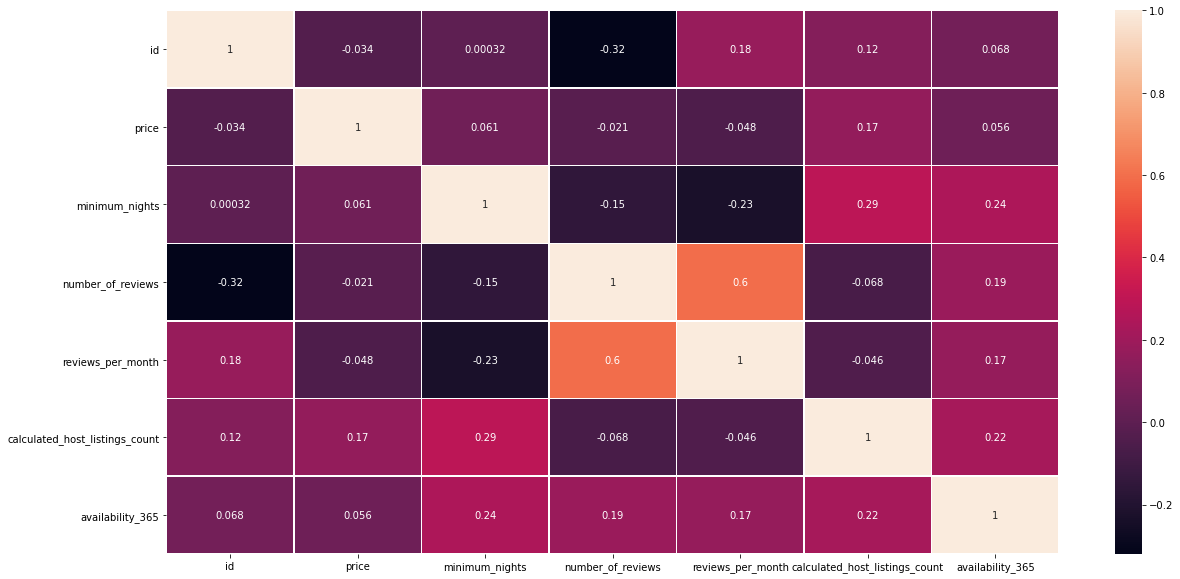

In [21]:
# Constructing a heatmap with our dummy values.
# We have left our neighbourhood on purpose due to the fact it contains way too many data points
fig, ax = plt.subplots( figsize = (20, 10) )
sns.color_palette( "husl", 8 )
sns.heatmap( df_test.corr(), annot = True, linewidths = .5, ax = ax )

In [22]:
# The price column is our target
X = df.loc[:, df.columns != 'price']
y = df['price']

# Split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state = 0 )

In [23]:
df.shape

(44977, 234)

## Machine learning models

### KNeighborsRegressor

In [24]:
knreg = KNeighborsRegressor().fit( X_train, y_train )
print( "Training set score: {:.3f}".format( knreg.score( X_train, y_train ) ) )
print( "Test set score: {:.3f}".format( knreg.score( X_test, y_test ) ) )

Training set score: 0.245
Test set score: -0.129


### KNeighborsRegressor (tuned)

In [25]:
neighbours      = [85, 90, 95]
distances       = ['uniform', 'distance']
accuracy_output = []
training_scores = []
test_scores     = []

for neighbour in neighbours: 
    for distance in distances:
        knreg = KNeighborsRegressor( n_neighbors = neighbour ) 
        knreg.fit( X_train, y_train )
        training = knreg.score( X_train, y_train )
        tests    = knreg.score( X_test, y_test )
        accuracy_output.append( (neighbour, distance, tests, training) )

for idx, key in enumerate( sorted ( accuracy_output, reverse = True, key = lambda e:e[2] ) ):
    print(f"Neighbours {key[0]}, weight used {key[1]}, test accuracy: {key[2]}, train accuracy: {key[3]} \n")
    
    if idx == 0:
        training_scores.append( key[3] )
        test_scores.append( key[2] )

Neighbours 95, weight used uniform, test accuracy: 0.014315471906992894, train accuracy: 0.030016635276351344 

Neighbours 95, weight used distance, test accuracy: 0.014315471906992894, train accuracy: 0.030016635276351344 

Neighbours 85, weight used uniform, test accuracy: 0.014010767742318908, train accuracy: 0.031219331037975917 

Neighbours 85, weight used distance, test accuracy: 0.014010767742318908, train accuracy: 0.031219331037975917 

Neighbours 90, weight used uniform, test accuracy: 0.013959309007694265, train accuracy: 0.030262169140524486 

Neighbours 90, weight used distance, test accuracy: 0.013959309007694265, train accuracy: 0.030262169140524486 



### LinearRegression

In [26]:
lr = LinearRegression().fit( X_train, y_train )
training_score = lr.score( X_train, y_train )
test_score = lr.score( X_test, y_test )

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
# Might be underfitted, or data just doesn't allow for better accuracy

training_scores.append( training_score )
test_scores.append( test_score )

Training set score: 0.55
Test set score: 0.55


### Ridge

In [27]:
ridge = Ridge().fit( X_train, y_train )
print( "Training set score: {:.3f}".format( ridge.score( X_train, y_train ) ) )
print( "Test set score: {:.3f}".format( ridge.score( X_test, y_test ) ) )
# Might be underfitted, or data just doesn't allow for better accuracy

Training set score: 0.553
Test set score: 0.547


/Users/magnussmed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.4173e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


### Ridge (tuned)

In [28]:
"""
Different inputs tried:
fit_int = [True, False]
normalize = [True, False]
alpha = [0.1, 1, 10, 100]
alpha = [1, 5, 10, 15]
"""
alpha           = [1, 5, 6, 7, 8, 9, 10, 11, 12]
accuracy_output = []

for a in alpha:
    ridge = Ridge( alpha = a ) 
    ridge.fit( X_train, y_train )
    training = ridge.score( X_train, y_train )
    tests    = ridge.score( X_test, y_test )
    accuracy_output.append( (a, tests, training) )

for idx, key in enumerate( sorted ( accuracy_output, reverse = True, key = lambda e:e[1] ) ):
    print(f"alpha: {key[0]}, test accuracy: {key[1]}, train accuracy: {key[2]} \n")
    
    if idx == 0:
        training_scores.append( key[2] )
        test_scores.append( key[1] )

/Users/magnussmed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.4173e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/magnussmed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19978e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/magnussmed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43767e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/magnussmed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67505e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/magnussmed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: L

alpha: 7, test accuracy: 0.5468893855151471, train accuracy: 0.5523268972921498 

alpha: 8, test accuracy: 0.5468892814172233, train accuracy: 0.5521984027424987 

alpha: 9, test accuracy: 0.5468832297590226, train accuracy: 0.552076128142831 

alpha: 6, test accuracy: 0.5468819004286403, train accuracy: 0.5524627532797145 

alpha: 10, test accuracy: 0.5468723924713347, train accuracy: 0.5519591347477766 

alpha: 5, test accuracy: 0.546864404226338, train accuracy: 0.5526073153600765 

alpha: 11, test accuracy: 0.5468576217006555, train accuracy: 0.5518466577429411 

alpha: 12, test accuracy: 0.5468395611919903, train accuracy: 0.5517380740348872 

alpha: 1, test accuracy: 0.5465601489416344, train accuracy: 0.5532787610826142 



/Users/magnussmed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.85579e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


### Lasso

In [29]:
lasso = Lasso().fit( X_train, y_train )
print( "Training set score: {:.3f}".format( lasso.score( X_train, y_train ) ) )
print( "Test set score: {:.3f}".format( lasso.score( X_test, y_test ) ) )
# print("Number of features used:", np.sum(lasso.coef_ != 0))
# Might be underfitted

Training set score: 0.483
Test set score: 0.483


### Lasso (tuned)

In [ ]:
"""
Different inputs tried:
alpha = [0.0001, 0.001, 0.01, 0.1, 1.0]
max_iter = [1000, 2000, 3000, 4000]
"""
alpha           = [0.0001, 0.001]
accuracy_output = []

for a in alpha:
    lasso = Lasso( alpha = a, max_iter = 50000 ) 
    lasso.fit( X_train, y_train )
    training = lasso.score( X_train, y_train )
    tests    = lasso.score( X_test, y_test )
    accuracy_output.append( (a, tests, training) )

for idx, key in enumerate( sorted ( accuracy_output, reverse = True, key = lambda e:e[1] ) ):
    print(f"alpha: {key[0]}, test accuracy: {key[1]}, train accuracy: {key[2]} \n")
    
    if idx == 0:
        training_scores.append( key[2] )
        test_scores.append( key[1] )

### DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor().fit( X_train, y_train )
print( "Training set score: {:.3f}".format( tree.score( X_train, y_train ) ) )
print( "Test set score: {:.3f}".format( tree.score( X_test, y_test ) ) )
# Overfitted

### DecisionTreeRegressor (tuned)

In [ ]:
max_depth         = [9, 10, 11, 12, 13, 14]
min_samples_split = [10, 200, 225, 250, 275, 300]
max_features      = ['auto', 'sqrt', 'log2']
accuracy_output   = []

for md in max_depth:
    for mss in min_samples_split:
        for mx in max_features:        
            tree = DecisionTreeRegressor( max_depth = md, min_samples_split = mss ) 
            tree.fit( X_train, y_train )
            training = tree.score( X_train, y_train )
            tests    = tree.score( X_test, y_test )
            accuracy_output.append( (md, mss, mx, tests, training) )

for idx, key in enumerate( sorted ( accuracy_output, reverse = True, key = lambda e:e[3] ) ):
    print(f"max depth: {key[0]}, min samples split: {key[1]}, max features {key[2]}, test accuracy: {key[3]}, train accuracy: {key[4]} \n")
    
    if idx == 0:
        training_scores.append( key[4] )
        test_scores.append( key[3] )

### RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor().fit( X_train, y_train )
print( "Training set score: {:.3f}".format( rfr.score( X_train, y_train ) ) )
print( "Test set score: {:.3f}".format( rfr.score( X_test, y_test ) ) )
# Might be overfitted

### RandomForestRegressor (tuning tests)

In [ ]:
"""
max_depth         = [10, 50, 100]
n_estimators      = [300, 400, 500]
min_samples_split = [10, 200, 300]
max_features      = ['auto', 'sqrt', 'log2']
accuracy_output   = []

for md in max_depth:
    for ne in n_estimators:
        for mss in min_samples_split:
            for mx in max_features:        
                rfr = RandomForestRegressor( max_depth = md, n_estimators = ne, min_samples_split = mss ) 
                rfr.fit( X_train, y_train )
                training = rfr.score( X_train, y_train )
                tests = rfr.score( X_test, y_test )
                accuracy_output.append( (md, ne, mss, mx, tests, training) )
for key in sorted ( accuracy_output, reverse = True, key = lambda e:e[4] ):
    print(f"max depth: {key[0]}, n_estimators: {key[1]} min samples split: {key[2]}, max features {key[3]}, test accuracy: {key[4]}, train accuracy: {key[5]} \n")
"""

### RandomForestRegressor (tuned)

In [ ]:
# Optimal tuning found through manual trial and error
rfr = RandomForestRegressor( max_depth = 100, n_estimators = 550, min_samples_split = 50 ) 
rfr.fit( X_train, y_train )

train_score = rfr.score( X_train, y_train )
test_score  = rfr.score( X_test, y_test )

print( "Training set score: {:.3f}".format( train_score ) )
print( "Test set score: {:.3f}".format( test_score ) )

training_scores.append( train_score )
test_scores.append( test_score )

### RandomForestRegressor Feature Importances

In [ ]:
features    = df_test.columns
df_test.info()
importances = rfr.feature_importances_
indices     = np.argsort( importances )

n = 10

plt.subplots( figsize = (20, 20) )
plt.title( 'Feature Importances' )
plt.barh( range( n ), importances[indices][:n], color = 'g', align = 'center' )
plt.yticks( range( len( indices ) ), features[indices] )
plt.xlabel( 'Importance' )
plt.show()

## Test and training results visualized

In [ ]:
index     = np.arange( 6 )
bar_width = 0.5

print(test_scores)

fig, ax  = plt.subplots( figsize = (15, 10) )
training = ax.bar( index, training_scores, bar_width, label = "Training accuracy" )
testing  = ax.bar( index, test_scores, bar_width, label = "Test accuracy")

ax.set_xlabel( 'Models' )
ax.set_ylabel( 'Accuracy' )
ax.set_title( 'Comparing our models' )
ax.set_xticks( index + bar_width / 2 )
ax.set_xticklabels( ["KNeighborsRegressor", "LinearRegression", "Ridge", "Lasso", "DecisionTreeRegressor", "RandomForestRegressor"] )
ax.legend()

plt.show()